In [224]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualize
import matplotlib.pyplot as plt #For visualization
from matplotlib import rcParams #add styling to the plots
from matplotlib.cm import rainbow #for colors
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Process the data 
from sklearn.model_selection import train_test_split #split the available dataset for testing and training
from sklearn.preprocessing import StandardScaler #To scale the features
#Machine Learning algorithms I will be using.

from sklearn.neighbors import KNeighborsClassifier #K Neighbors Classifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['heart.csv']


In [225]:
# read the data file
dataset = pd.read_csv('../input/heart.csv')

In [226]:
dataset.shape # number of rows and columns

(303, 14)

In [227]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we will train the models to find.

In [228]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

In [229]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


In [ ]:
# dataset.isnull().sum()
# dataset.isnull().values.any()

**Descriptions of the columns in the dataset**

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)


In [230]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [231]:
#Rename the columns
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [232]:
dataset.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [233]:
dataset.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

**Visualize the data**

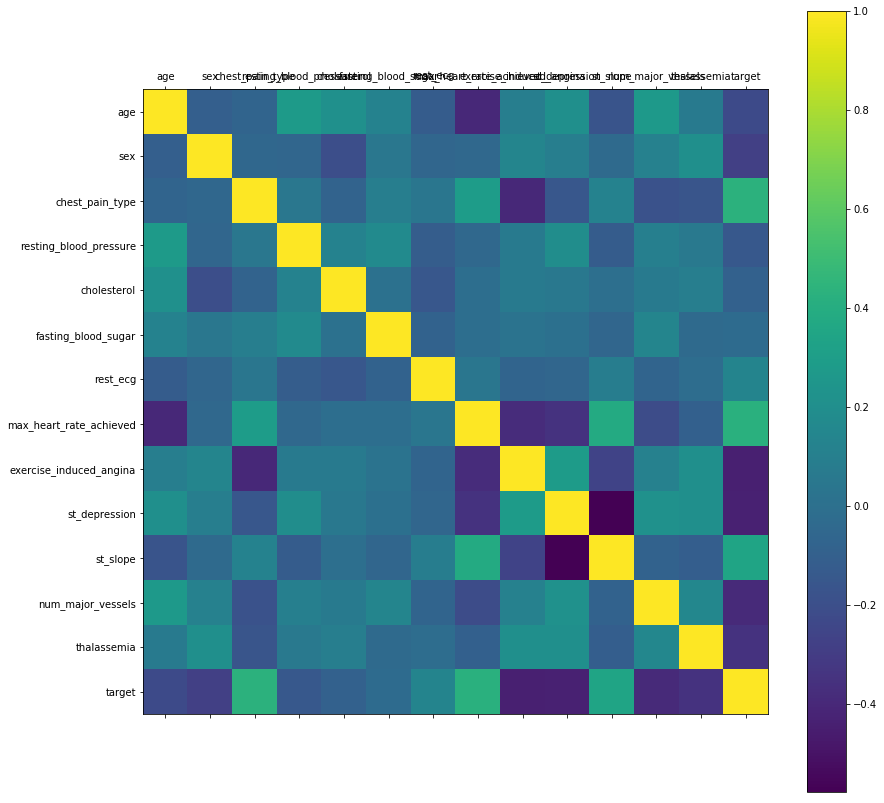

In [234]:
# Understanding the data
# Visualizations to better understand data and do any processing if needed.
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1005ee8d0>,
      dtype=object)

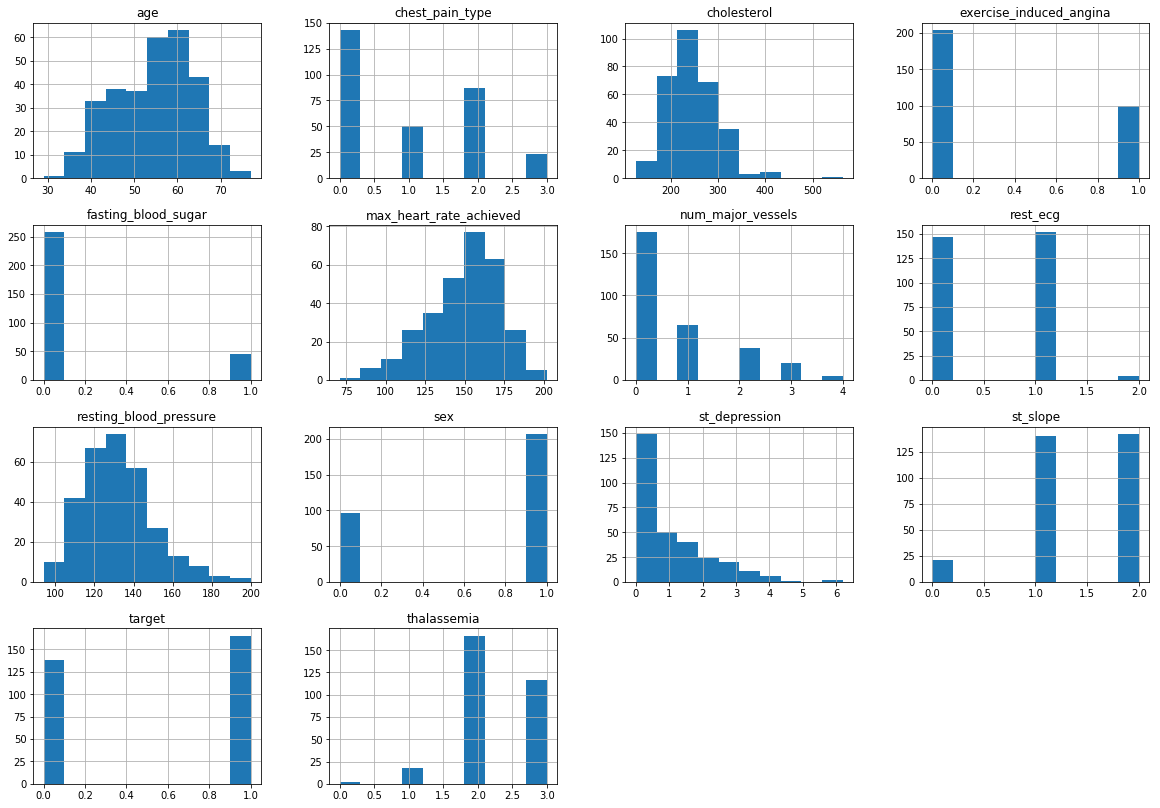

In [235]:
dataset.hist()

Each feature has a different range of distribution.  Scaling before our predictions should be helpful. Also, the categorical features do stand out.


Text(0.5, 1.0, 'Count of each Target Class')

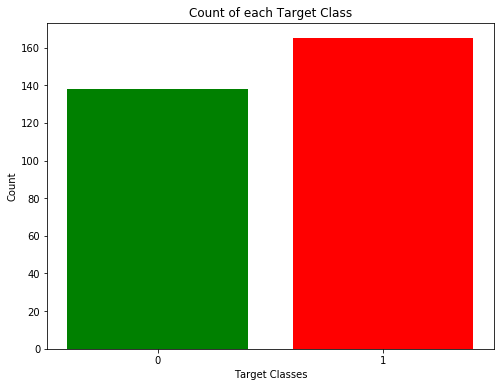

In [284]:
# Check for the target classes to evaluate if they are of approximately same size

rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

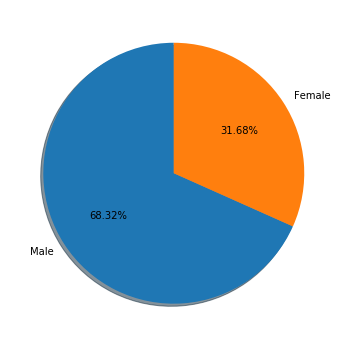

In [237]:
# Male vs Female data
male = len(dataset[dataset.sex == 1])
female = len(dataset[dataset.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

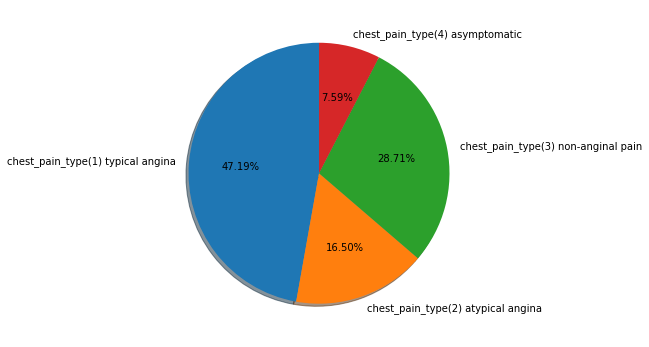

In [238]:
# Chest Pain Type
x = [len(dataset[dataset['chest_pain_type'] == 0]),len(dataset[dataset['chest_pain_type'] == 1]), len(dataset[dataset['chest_pain_type'] == 2]), len(dataset[dataset['chest_pain_type'] == 3])]
plt.pie(x, data=dataset, labels=['chest_pain_type(1) typical angina', 'chest_pain_type(2) atypical angina', 'chest_pain_type(3) non-anginal pain', 'chest_pain_type(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

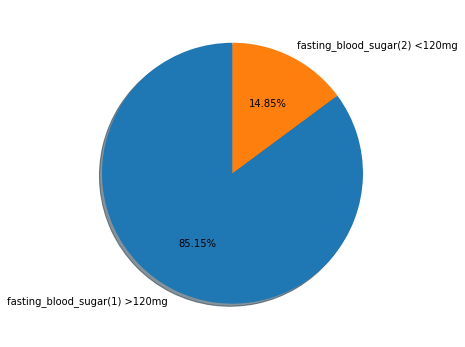

In [239]:
# Fasting Blood Sugar

x = [len(dataset[dataset['fasting_blood_sugar'] == 0]),len(dataset[dataset['fasting_blood_sugar'] == 1])]
plt.pie(x, data=dataset, labels=['fasting_blood_sugar(1) >120mg', 'fasting_blood_sugar(2) <120mg',], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()




Text(0.5, 1.0, 'Ca values in data')

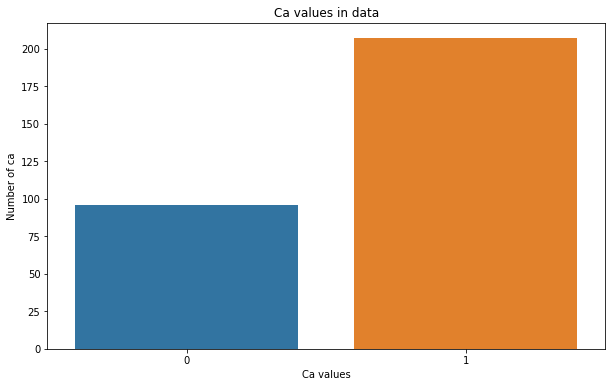

In [240]:
#
plt.figure(figsize=(10,6))
count= dataset.sex.value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca")
plt.xlabel("Ca values")
plt.title("Ca values in data", color="black", fontsize="12")



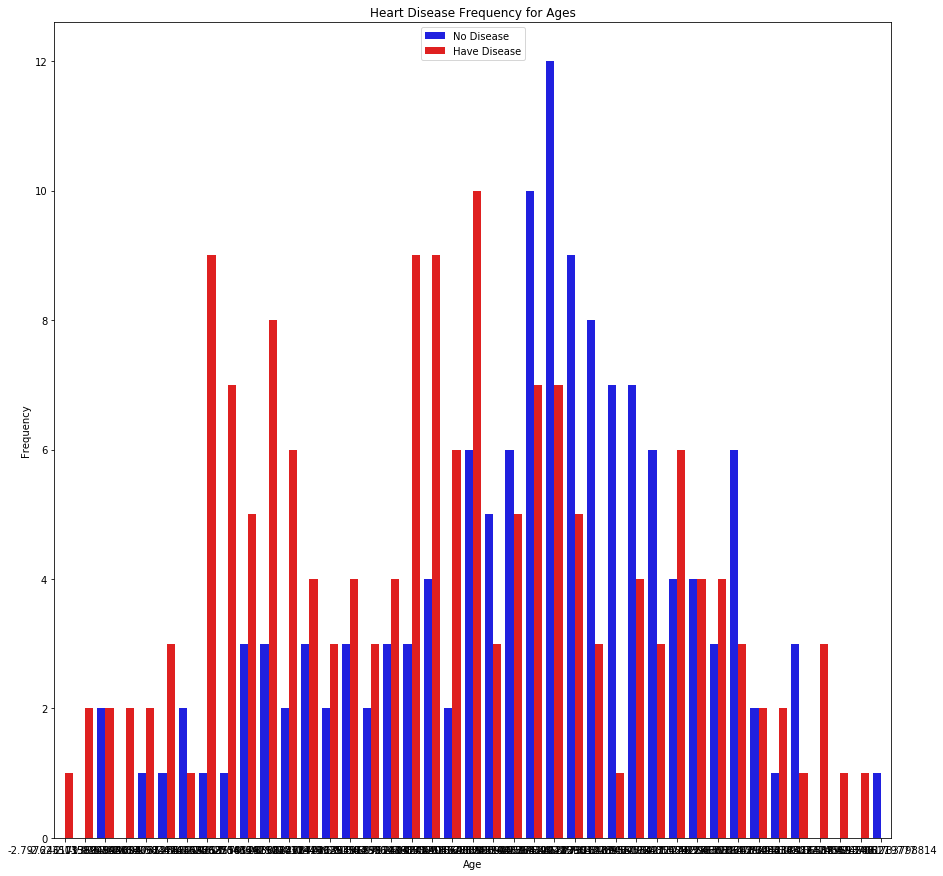

In [282]:
# Heart disease frequency by age
plt.figure(figsize=(15, 15))
sns.countplot(x='age', hue='target', data=dataset, palette=['blue', 'red'])
plt.legend(["No Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

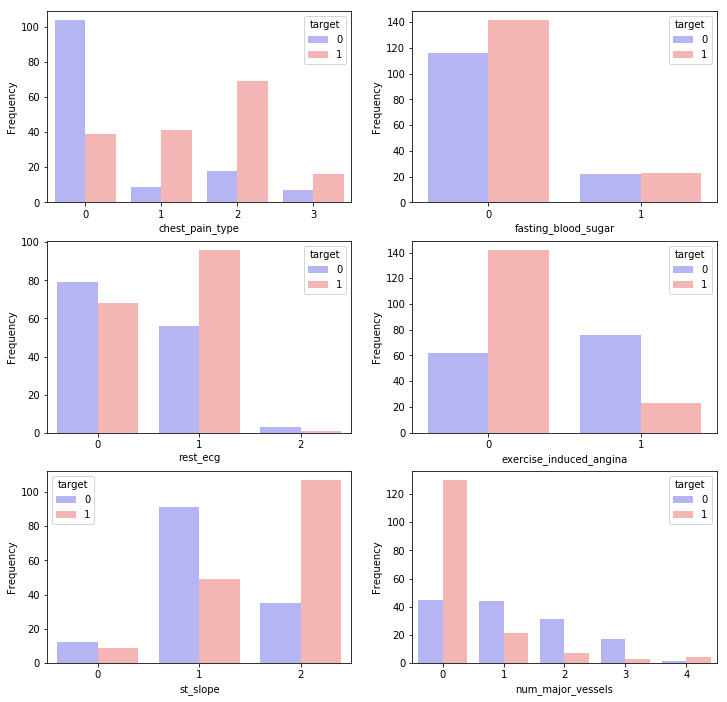

In [242]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
fs = ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exercise_induced_angina', 'st_slope', 'num_major_vessels']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='target', data=dataset, palette='bwr', ax=axi) 
    axi.set(ylabel='Frequency')

**Data Processing**

In [243]:
# Data Processing
# Convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. 
# First,use the get_dummies method to create dummy columns for categorical variables.
dataset = pd.get_dummies(dataset, columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'])

In [244]:
# Use the StandardScaler from sklearn to scale my dataset.
#dataset.columns
standardScaler = StandardScaler()
columns_to_scale = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
#dataset.columns

**Machine Learning**

import train_test_split to split our dataset into training and testing datasets. 

In [245]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


**K Neighbors Classifier**

The classification score varies based on different values of neighbors that we choose. Plot a score graph for different values of K (neighbors) and check when we achieve the best score.

In [246]:
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

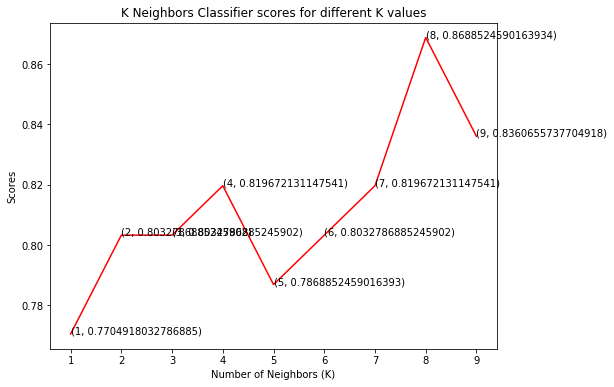

In [247]:
# Scores for different neighbor values are in the array knn_scores. Plot and see for which value of K we get the best scores.

plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [252]:
print("The score for K Neighbors Classifier is {:0.2f}% with {} neighbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 86.89% with 8 neighbors.


**Support Vector Classifier**

In [249]:
# Support Vector Classifier
# There are several kernels for Support Vector Classifier. We will test some of them and check which has the best score.


svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

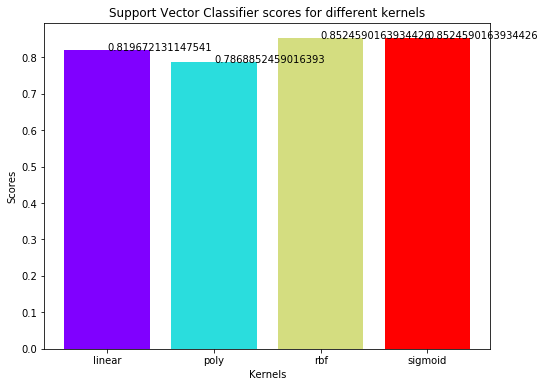

In [250]:
# Plot a bar plot of scores for each kernel and see which performed the best.

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [253]:
print("The score for Support Vector Classifier is {:0.2f}% with {} kernel.".format(svc_scores[3]*100, 'sigmoid'))

The score for Support Vector Classifier is 85.25% with sigmoid kernel.


**Decision Tree Classifier**

In [254]:
# Decision Tree Classifier
# Use the Decision Tree Classifier. Vary between a set of max_features and see which returns the best accuracy.

dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

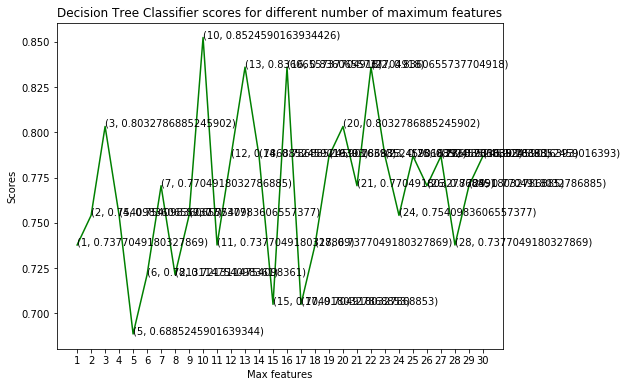

In [255]:
# Select the maximum number of features from 1 to 30 for split and see the scores for each of those cases.

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [256]:
print("The score for Decision Tree Classifier is {:0.2f}% with {} maximum features.".format(dt_scores[9]*100, [10]))

The score for Decision Tree Classifier is 85.25% with [10] maximum features.


**Random Forest Classifier**

In [257]:
# Random Forest Classifier
# Use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.
rf_scores = []
estimators = [10, 100, 200, 500,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

In [258]:
rf_scores[0]

0.8524590163934426

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

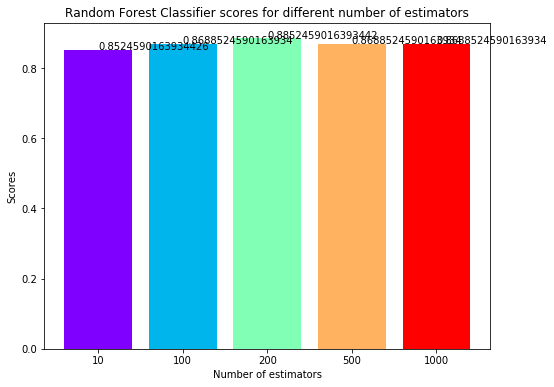

In [259]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [260]:
print("The score for Random Forest Classifier is {:0.2f}% with {} estimators.".format(rf_scores[2]*100, [200]))

The score for Random Forest Classifier is 88.52% with [200] estimators.


In [261]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
rf_scores = []
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
Y_pred_xgb = xgb_model.predict(X_test)
rf_scores.append(xgb_model.score(X_test, y_test))

In [262]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
print("The score for Random Forest Classifier is {:0.2f}% with {} estimators.".format(rf_scores[0]*100, 2))


The accuracy score achieved using XGBoost is: 86.89 %
The score for Random Forest Classifier is 86.89% with 2 estimators.


**Random Forest Classifier with a score of  88.52%  was the best model.**